### 1. Upload Dataset

In [1]:
from google.colab import files
uploaded = files.upload()  # pilih file online_retail_II.xlsx

Saving online_retail_II.xlsx to online_retail_II.xlsx


Mengunggah file online_retail_II.xlsx dari komputer ke Colab.

### 2. Instalasi Library

In [28]:
!pip install openpyxl seaborn matplotlib scikit-learn

Penjelasan:

openpyxl → membaca file Excel.

seaborn & matplotlib → visualisasi.

scikit-learn → untuk K-Means Clustering.

## 3. Load Dataset

In [29]:
import pandas as pd

df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Membaca dataset dan melihat informasi awalnya.

Output:

Tabel DataFrame berisi 5 baris pertama dataset (kolom seperti Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country)

## 4. Cek Missing Value

In [30]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


Mengecek jumlah data kosong di setiap kolom.

### 5. Pembersihan Data

In [37]:
# Hapus baris tanpa Customer ID
df = df.dropna(subset=['Customer ID'])

# Hapus data dengan Quantity atau Price <= 0
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Tambahkan kolom TotalPrice
df['TotalPrice'] = df['Quantity'] * df['Price']

# Tampilkan 5 data pertama untuk memastikan hasilnya
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Menghapus data tidak valid dan membuat kolom total harga per transaksi.

## 6. Visualisasi Produk Terlaris

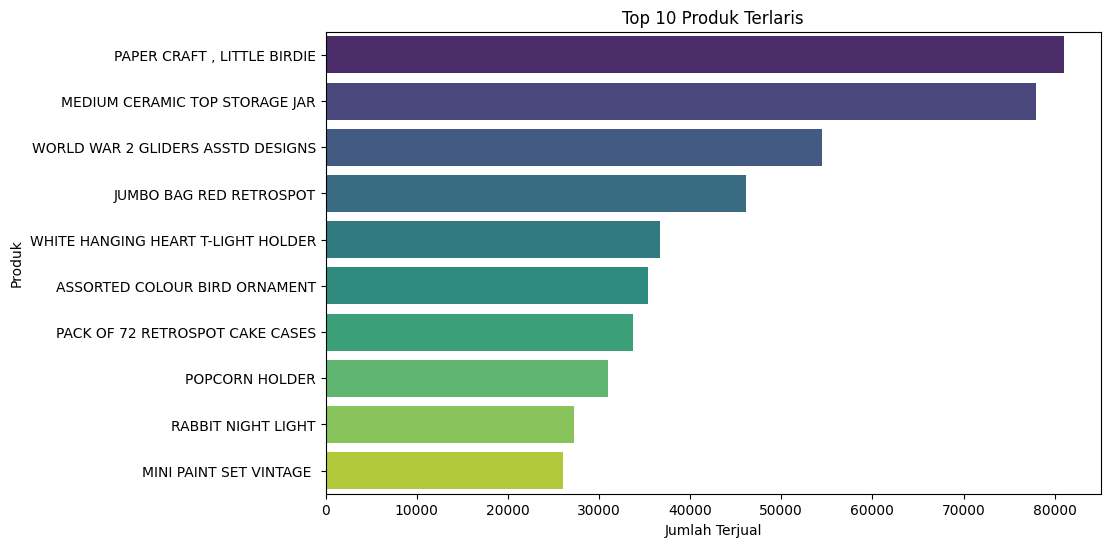

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Produk')
plt.show()

Menghitung jumlah penjualan per produk dan memvisualisasikan 10 teratas.

### 7. Visualisasi Pendapatan per Negara

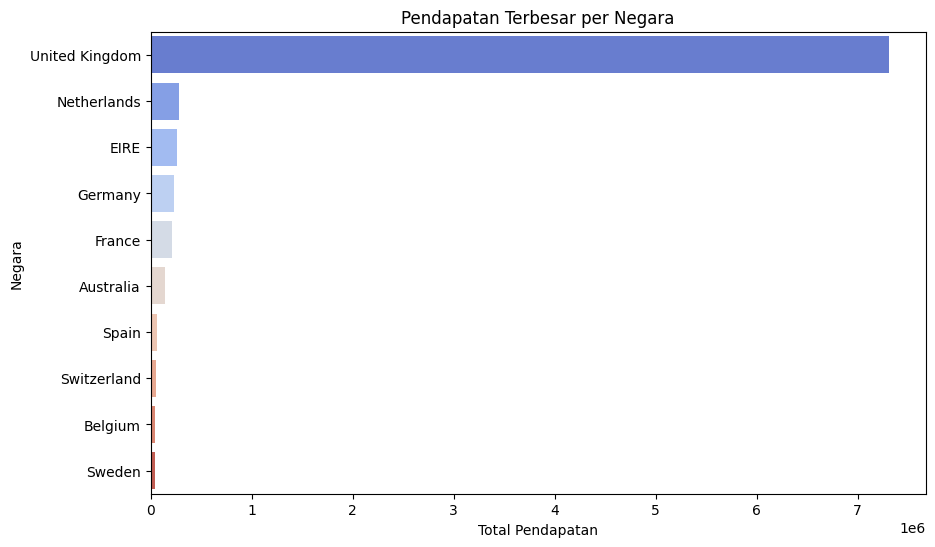

In [39]:
revenue_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_country.values, y=revenue_country.index, palette='coolwarm')
plt.title('Pendapatan Terbesar per Negara')
plt.xlabel('Total Pendapatan')
plt.ylabel('Negara')
plt.show()

Menghitung pendapatan per negara dan menampilkan 10 terbesar.

### 8. Analisis RFM

In [40]:
import datetime as dt
now = dt.datetime(2011,12,10)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


Menghitung Recency, Frequency, dan Monetary untuk setiap pelanggan.

### 9. Visualisasi Distribusi RFM

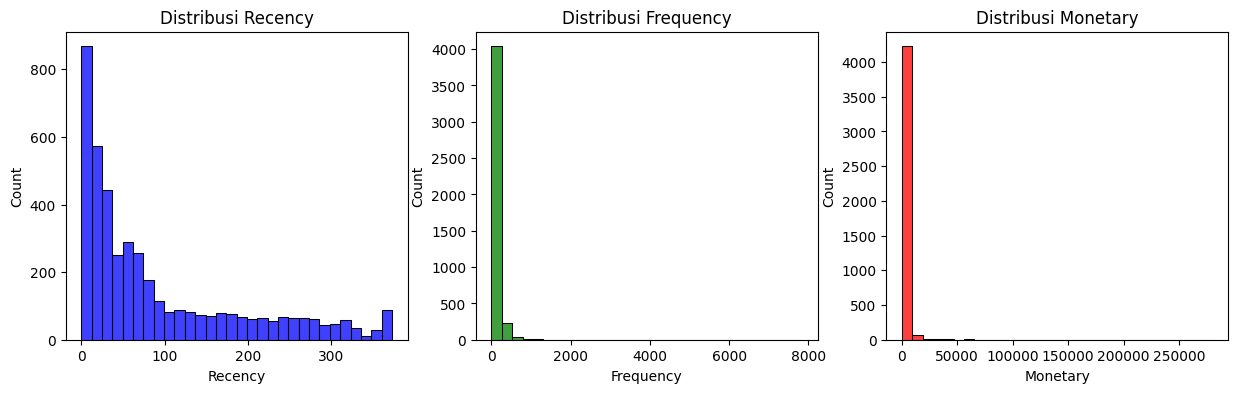

In [41]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, color='blue')
plt.title('Distribusi Recency')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, color='green')
plt.title('Distribusi Frequency')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=30, color='red')
plt.title('Distribusi Monetary')

plt.show()

Melihat distribusi nilai RFM dalam bentuk histogram.

### 10. Normalisasi Data untuk K-Means

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

Menstandarisasi data RFM agar semua variabel punya skala yang sama.

### 11. Menentukan Jumlah Cluster (Metode Elbow)

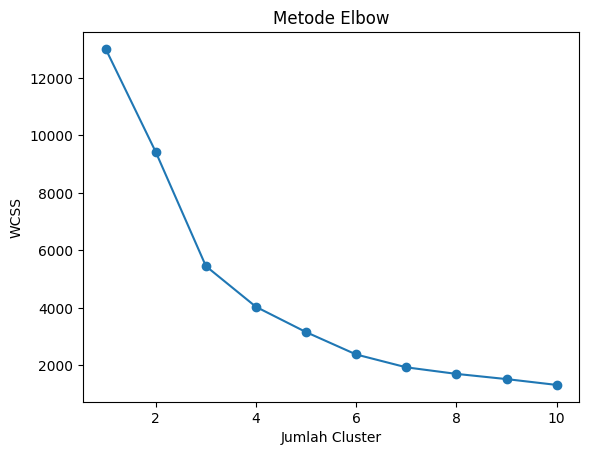

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Menggunakan Metode Elbow untuk menentukan jumlah cluster optimal.

## 12. Jalankan K-Means

In [44]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,325,1,77183.60,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,0
12349.0,18,73,1757.55,0
12350.0,310,17,334.40,1


Mengelompokkan pelanggan menjadi 4 cluster berdasarkan skor RFM.

### 13. Visualisasi Cluster

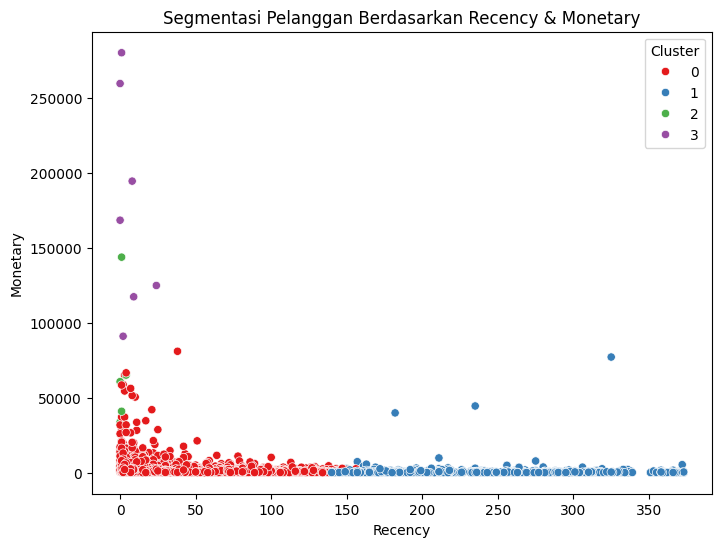

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='Set1')
plt.title('Segmentasi Pelanggan Berdasarkan Recency & Monetary')
plt.show()

Menampilkan penyebaran pelanggan per cluster berdasarkan Recency & Monetary.

In [47]:
df.to_csv('cleaned_online_retail.csv', index=False)
rfm.to_csv('rfm_with_clusters.csv')

In [48]:
  files.download('cleaned_online_retail.csv')
files.download('rfm_with_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>